# 一个用于分析 median_coverage_genomes.parquet 文件的 Jupyter Notebook
本 Notebook 旨在分析 median_coverage_genomes.parquet 文件中的数据，探索其统计特性并进行可视化。

## 导入必要的库
导入 pandas、matplotlib 和 seaborn 等库，用于数据处理和可视化。

In [4]:
pip install pyarrow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.7/30.7 MB 2.8 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [1]:
# 导入必要的库
import pandas as pd
import matplotlib.pyplot as plt

## 加载数据
使用 pandas 的 read_parquet 方法加载 median_coverage_genomes.parquet 文件。

In [2]:
# 加载数据
file_path = "/Users/azddza/Electromics-project/data/median_coverage_genomes.parquet"
df = pd.read_parquet(file_path)

# 检查数据加载是否成功
print(f"数据集包含 {df.shape[0]} 行和 {df.shape[1]} 列。")

数据集包含 15 行和 241 列。


## 数据预览
使用 head() 方法查看数据的前几行，并使用 info() 和 describe() 方法检查数据的基本信息和统计信息。

In [3]:
# 数据预览
# 查看前几行
print(df.head())

# 检查数据的基本信息
print(df.info())

# 查看数据的统计信息
print(df.describe())

Genome      index   MAG001  MAG002  MAG003   MAG004  MAG005  MAG006  MAG007  \
0       NSg1AJ41C  144.805  106.79   23.15   97.310  80.285   24.04   23.51   
1       NSg1BJ41C    0.000  123.42   11.31  102.315  10.950   26.28   24.30   
2       NSg1CJ41C    0.000   71.37    0.00    0.000   0.640   22.18   28.28   
3         R1J142A    0.000    0.00    0.00    0.000   0.090    0.00    0.00   
4         R2J142A    0.000    0.00    0.00    0.000   0.000    0.00    0.00   

Genome  MAG008  MAG009  ...  MAG231  MAG232  MAG233  MAG234  MAG235  MAG236  \
0        46.90  116.28  ...     0.0    0.07    0.36     0.0    0.13     0.0   
1        54.29   68.63  ...     0.0    0.07    0.37     0.0    0.14     0.0   
2        41.80   39.50  ...     0.0    0.09    0.49     0.0    0.11     0.0   
3         0.00    0.00  ...     0.0    1.98    0.00     0.0    0.00     0.0   
4         0.00    0.00  ...     0.0    1.02    0.00     0.0    0.00     0.0   

Genome  MAG237  MAG238  MAG239  MAG240  
0        

## 统计描述
计算覆盖率的均值、中位数、标准差等统计指标，并分析数据分布。

In [7]:
sample_names = df.iloc[:, 0]
coverage_matrix = df.iloc[:, 1:]  # 从 MAG001 开始

# 计算每一行的总覆盖度（所有 MAG 的覆盖度和）
total_coverage_per_sample = coverage_matrix.sum(axis=1)

# 计算相对丰度（每个 MAG 的覆盖度 / 总覆盖度）
relative_abundance = coverage_matrix.div(total_coverage_per_sample, axis=0)

# 加回样本名
relative_abundance.insert(0, "Sample", sample_names)

# 查看结果
relative_abundance

Genome,Sample,MAG001,MAG002,MAG003,MAG004,MAG005,MAG006,MAG007,MAG008,MAG009,...,MAG231,MAG232,MAG233,MAG234,MAG235,MAG236,MAG237,MAG238,MAG239,MAG240
0,NSg1AJ41C,0.054366,0.040093,0.008691,0.036534,0.030142,0.009026,0.008827,0.017608,0.043656,...,0.000000,0.000026,0.000135,0.000000,0.000049,0.000000,0.000000,0.000503,0.000000,0.0000
1,NSg1BJ41C,0.000000,0.050180,0.004598,0.041599,0.004452,0.010685,0.009880,0.022073,0.027904,...,0.000000,0.000028,0.000150,0.000000,0.000057,0.000000,0.000000,0.000557,0.000000,0.0000
2,NSg1CJ41C,0.000000,0.030369,0.000000,0.000000,0.000272,0.009438,0.012034,0.017787,0.016808,...,0.000000,0.000038,0.000209,0.000000,0.000047,0.000000,0.000000,0.000536,0.000000,0.0000
3,R1J142A,0.000000,0.000000,0.000000,0.000000,0.000021,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000472,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000
4,R2J142A,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000249,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000
5,R3J142A,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.004000,0.000000,0.000000,0.000000,0.000510,0.000000,0.000000,0.000000,0.0000
6,R4J147A,0.000000,0.006760,0.000000,0.000000,0.000000,0.000000,0.000000,0.000150,0.000029,...,0.000000,0.000000,0.000842,0.000000,0.000000,0.000000,0.000000,0.000075,0.000000,0.0000
7,R4J147C,0.000000,0.002058,0.000000,0.004176,0.000145,0.000000,0.000323,0.021337,0.000000,...,0.000000,0.000065,0.000000,0.000000,0.000145,0.000000,0.000000,0.000544,0.000000,0.0000
8,R5J141A,0.000000,0.006423,0.000056,0.000000,0.000000,0.000000,0.000006,0.000180,0.000000,...,0.000000,0.000000,0.000080,0.000000,0.000000,0.000000,0.000000,0.000062,0.000000,0.0000
9,R5J141C,0.000000,0.000480,0.000000,0.001034,0.002577,0.000000,0.000612,0.023001,0.000000,...,0.000000,0.000023,0.000000,0.000000,0.000185,0.000000,0.000000,0.000699,0.000000,0.0000


In [5]:
relative_abundance.to_csv("/Users/azddza/Electromics-project/data/relative_abundance.csv", index=False)


gtdb——taxonomy

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 读取数据
file_path = "/Users/azddza/Electromics-project/data/gtdb_taxonomy.tsv"
data = pd.read_csv(file_path, sep='\t')

# 基本统计
print(f"数据集包含 {data.shape[0]} 行和 {data.shape[1]} 列。")
print(f"包含的基因组数量: {data['user_genome'].nunique()}")
print(f"包含的领域(Domain)数量: {data['Domain'].nunique()}")

数据集包含 240 行和 8 列。
包含的基因组数量: 240
包含的领域(Domain)数量: 2


In [2]:
data

,user_genome,Domain,phylum,class,order,family,genus,species
0,MAG021,Archaea,Halobacteriota,Methanosarcinia,Methanotrichales,Methanotrichaceae,Methanothrix,Methanothrix soehngenii
1,MAG040,Archaea,Halobacteriota,Methanomicrobia,Methanomicrobiales,Methanospirillaceae,UBA9949,UBA9949 sp012516785
2,MAG049,Archaea,Halobacteriota,Methanomicrobia,Methanomicrobiales,Methanospirillaceae,UBA9949,UBA9949 sp012516785
3,MAG052,Archaea,Halobacteriota,Methanomicrobia,Methanomicrobiales,Methanospirillaceae,Methanospirillum,Methanospirillum hungatei
4,MAG091,Archaea,Thermoplasmatota,Thermoplasmata,Methanomassiliicoccales,Methanomethylophilaceae,PWHV01,NaN
...,...,...,...,...,...,...,...,...
235,MAG236,Bacteria,Bacteroidota,Bacteroidia,Bacteroidales,Dysgonomonadaceae,UBA2632,NaN
236,MAG237,Bacteria,Bacillota_B,Desulfitobacteriia,Desulfitobacteriales,Desulfitobacteriaceae,Desulfosporosinus,NaN
237,MAG238,Bacteria,Pseudomonadota,Alphaproteobacteria,Rhodobacterales,Rhodobacteraceae,Paracoccus,Paracoccus versutus
238,MAG239,Bacteria,Bacillota_B,Desulfotomaculia,Desulfotomaculales,Desulfohalotomaculaceae,NaN,NaN


In [7]:
pip install ete3[gui]


zsh:1: no matches found: ete3[gui]
Note: you may need to restart the kernel to use updated packages.


In [9]:
from ete3 import Tree, TreeStyle

# 构造简单的分类路径树（仅示例）
t = Tree()
for _, row in df.iterrows():
    path = [row['Domain'], row['phylum'], row['class'], row['order'],
            row['family'], row['genus'], row['species']]
    t.add_child(name="|".join(path))  # 可以更细致地构造每层

# 可视化
ts = TreeStyle()
ts.show_leaf_name = True
t.show(tree_style=ts)


ImportError: cannot import name 'TreeStyle' from 'ete3' (/Users/azddza/Library/Caches/pypoetry/virtualenvs/electromics-project-Ddk0_V8b-py3.10/lib/python3.10/site-packages/ete3/__init__.py)

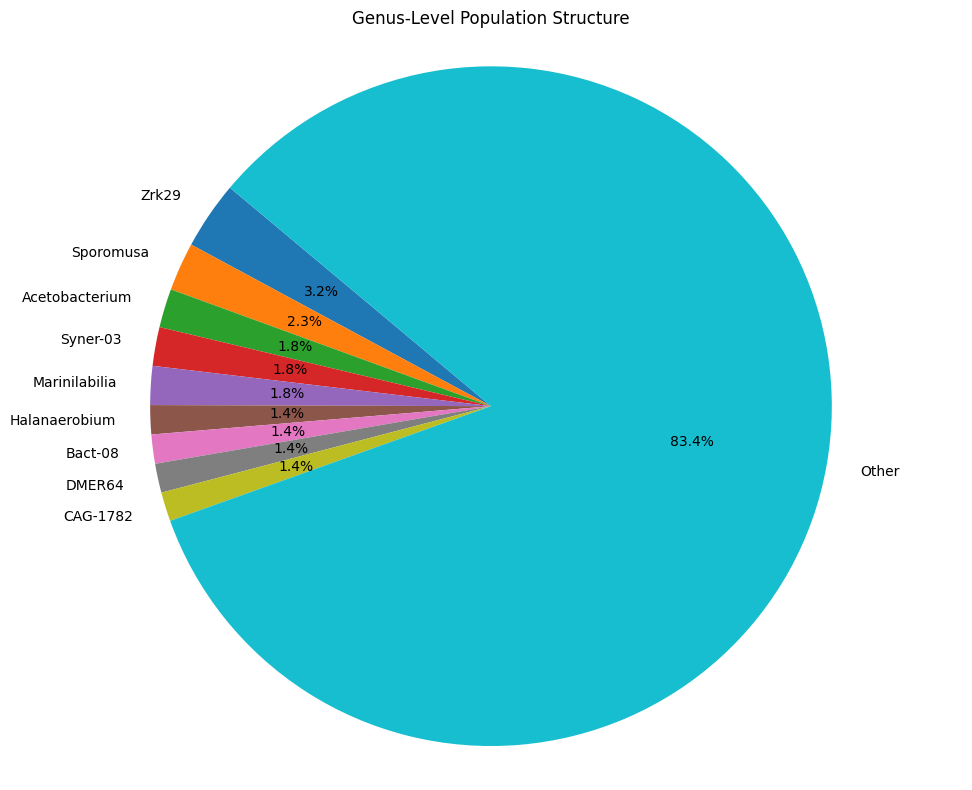

In [5]:
genus_counts = data['genus'].dropna().value_counts()

# 为了图形清晰，可以将低于一定阈值的合并为 "Other"
threshold = 3  # 出现次数小于3的归为其他
genus_main = genus_counts[genus_counts >= threshold]
genus_other = genus_counts[genus_counts < threshold].sum()

# 合并主类和“其他”
genus_combined = pd.concat([genus_main, pd.Series({'Other': genus_other})])

# 绘制饼图
plt.figure(figsize=(10, 8))
plt.pie(genus_combined, labels=genus_combined.index, autopct='%1.1f%%', startangle=140)
plt.title('Genus-Level Population Structure')
plt.axis('equal')  # 保持圆形
plt.tight_layout()
plt.show()



领域(Domain)分布:
Domain
Bacteria    226
Archaea      14
Name: count, dtype: int64


/var/folders/6w/knrbtrj125ggkrx091kd2g840000gn/T/ipykernel_10524/1923531538.py:14: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/6w/knrbtrj125ggkrx091kd2g840000gn/T/ipykernel_10524/1923531538.py:14: UserWarning: Glyph 37327 (\N{CJK UNIFIED IDEOGRAPH-91CF}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/6w/knrbtrj125ggkrx091kd2g840000gn/T/ipykernel_10524/1923531538.py:14: UserWarning: Glyph 22522 (\N{CJK UNIFIED IDEOGRAPH-57FA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/6w/knrbtrj125ggkrx091kd2g840000gn/T/ipykernel_10524/1923531538.py:14: UserWarning: Glyph 22240 (\N{CJK UNIFIED IDEOGRAPH-56E0}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/6w/knrbtrj125ggkrx091kd2g840000gn/T/ipykernel_10524/1923531538.py:14: UserWarning: Glyph 32452 (\N{CJK UNIFIED IDEOGRAPH-7EC4}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/6w/knrb

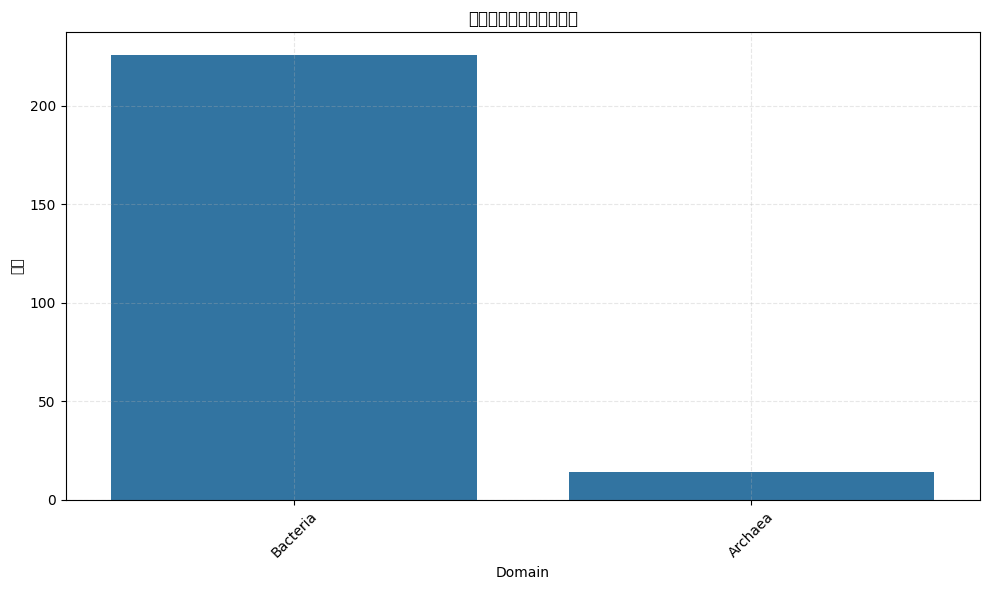

In [2]:
# 分析Domain分布
domain_counts = data['Domain'].value_counts()
print("\n领域(Domain)分布:")
print(domain_counts)

# 可视化Domain分布
plt.figure(figsize=(10, 6))
sns.barplot(x=domain_counts.index, y=domain_counts.values)
plt.title('基因组在不同领域的分布')
plt.xlabel('Domain')
plt.ylabel('数量')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()


物种(species)列的完整性: 45.42%


/var/folders/6w/knrbtrj125ggkrx091kd2g840000gn/T/ipykernel_10524/2321770828.py:16: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/6w/knrbtrj125ggkrx091kd2g840000gn/T/ipykernel_10524/2321770828.py:16: UserWarning: Glyph 31867 (\N{CJK UNIFIED IDEOGRAPH-7C7B}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/6w/knrbtrj125ggkrx091kd2g840000gn/T/ipykernel_10524/2321770828.py:16: UserWarning: Glyph 23618 (\N{CJK UNIFIED IDEOGRAPH-5C42}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/6w/knrbtrj125ggkrx091kd2g840000gn/T/ipykernel_10524/2321770828.py:16: UserWarning: Glyph 32423 (\N{CJK UNIFIED IDEOGRAPH-7EA7}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/6w/knrbtrj125ggkrx091kd2g840000gn/T/ipykernel_10524/2321770828.py:16: UserWarning: Glyph 32570 (\N{CJK UNIFIED IDEOGRAPH-7F3A}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/6w/knrb

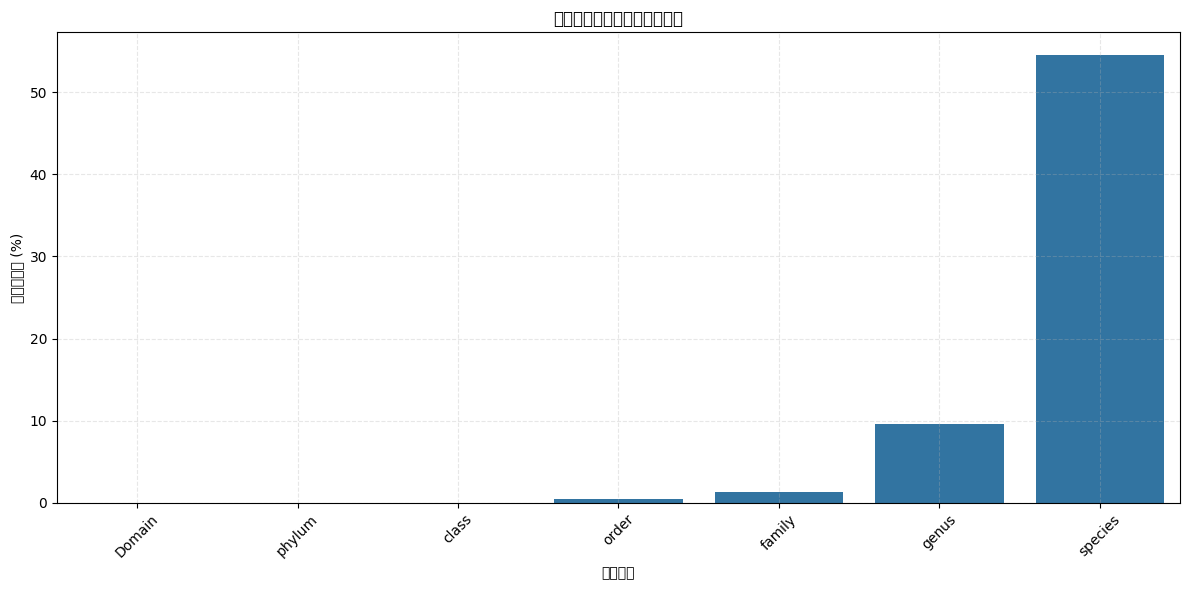

In [ ]:
# 物种完整性分析
# 检查species列的完整性
species_completeness = (data['species'].notna().sum() / len(data)) * 100
print(f"\n物种(species)列的完整性: {species_completeness:.2f}%")

# 分析每个层级的缺失情况
taxonomy_levels = ['Domain', 'phylum', 'class', 'order', 'family', 'genus', 'species']
missing_data = {level: (data[level].isna().sum() / len(data)) * 100 for level in taxonomy_levels}

plt.figure(figsize=(12, 6))
sns.barplot(x=list(missing_data.keys()), y=list(missing_data.values()))
plt.title('各分类层级的缺失数据百分比')
plt.xlabel('分类层级')
plt.ylabel('缺失百分比 (%)')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

/var/folders/6w/knrbtrj125ggkrx091kd2g840000gn/T/ipykernel_10524/1651998872.py:21: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/6w/knrbtrj125ggkrx091kd2g840000gn/T/ipykernel_10524/1651998872.py:21: UserWarning: Glyph 31867 (\N{CJK UNIFIED IDEOGRAPH-7C7B}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/6w/knrbtrj125ggkrx091kd2g840000gn/T/ipykernel_10524/1651998872.py:21: UserWarning: Glyph 23618 (\N{CJK UNIFIED IDEOGRAPH-5C42}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/6w/knrbtrj125ggkrx091kd2g840000gn/T/ipykernel_10524/1651998872.py:21: UserWarning: Glyph 32423 (\N{CJK UNIFIED IDEOGRAPH-7EA7}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/6w/knrbtrj125ggkrx091kd2g840000gn/T/ipykernel_10524/1651998872.py:21: UserWarning: Glyph 23436 (\N{CJK UNIFIED IDEOGRAPH-5B8C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/6w/knrb

<Figure size 1200x800 with 0 Axes>

/Users/azddza/Library/Caches/pypoetry/virtualenvs/electromics-project-Ddk0_V8b-py3.10/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 23436 (\N{CJK UNIFIED IDEOGRAPH-5B8C}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/azddza/Library/Caches/pypoetry/virtualenvs/electromics-project-Ddk0_V8b-py3.10/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 25972 (\N{CJK UNIFIED IDEOGRAPH-6574}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/azddza/Library/Caches/pypoetry/virtualenvs/electromics-project-Ddk0_V8b-py3.10/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 30334 (\N{CJK UNIFIED IDEOGRAPH-767E}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/azddza/Library/Caches/pypoetry/virtualenvs/electromics-project-Ddk0_V8b-py3.10/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarnin

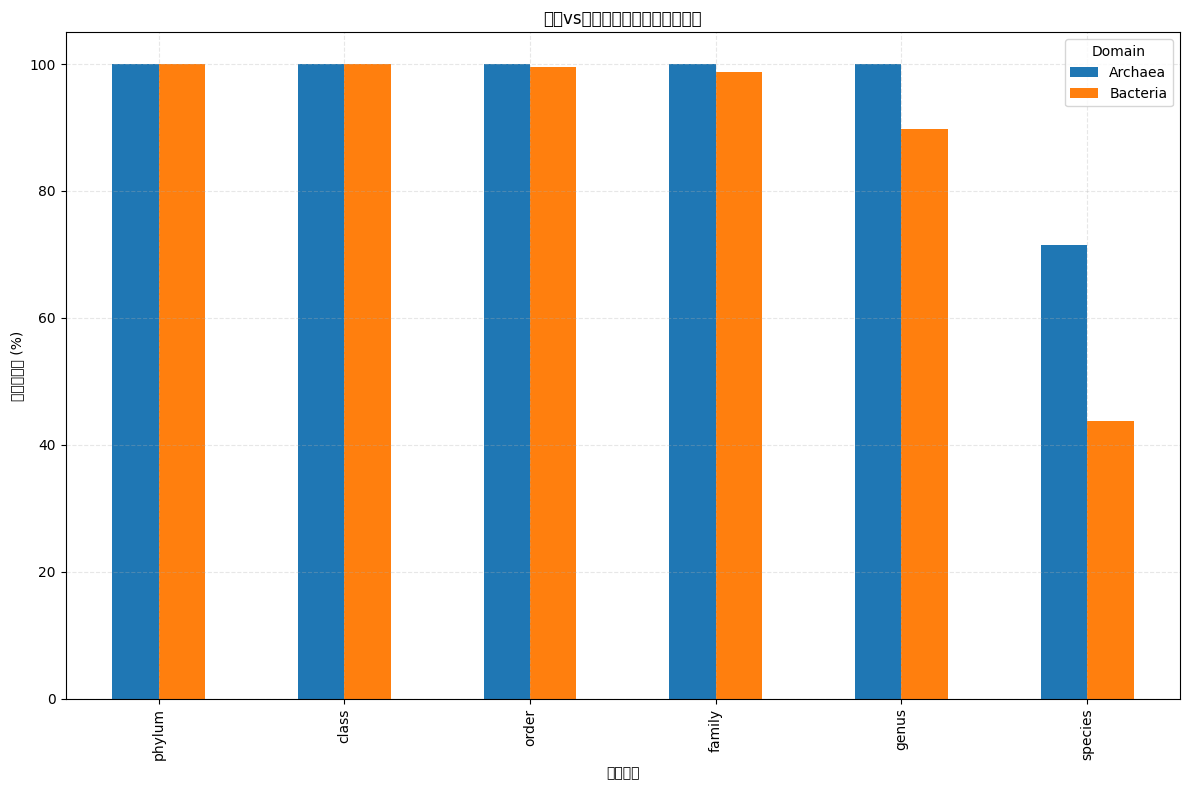

In [ ]:
#细菌vs古菌的分类层级比较
# 按Domain分组计算每个分类层级的完整性
domain_completeness = {}
for domain in data['Domain'].unique():
    domain_data = data[data['Domain'] == domain]
    domain_completeness[domain] = {
        level: (domain_data[level].notna().sum() / len(domain_data)) * 100 
        for level in taxonomy_levels[1:]  # 排除Domain本身
    }

# 转换为DataFrame以便可视化
completeness_df = pd.DataFrame(domain_completeness)

# 可视化
plt.figure(figsize=(12, 8))
completeness_df.plot(kind='bar', figsize=(12, 8))
plt.title('细菌vs古菌的分类信息完整性比较')
plt.xlabel('分类层级')
plt.ylabel('完整百分比 (%)')
plt.grid(True, alpha=0.3, linestyle='--')
plt.legend(title='Domain')
plt.tight_layout()
plt.show()

共有 108 种不同的物种
物种出现次数统计:
species
UBA9949 sp012516785            2
Methanothrix soehngenii        1
JAAYLU01 sp018436785           1
Rhodococcus fascians           1
Stutzerimonas kunmingensis     1
                              ..
Azospira oryzae                1
UBA1422 sp002304835            1
CAIXSE01 sp012719015           1
Cloacimonas acidaminivorans    1
Vallitalea guaymasensis        1
Name: count, Length: 108, dtype: int64

前15个最常见的物种:
species
UBA9949 sp012516785               2
Methanothrix soehngenii           1
JAAYLU01 sp018436785              1
Rhodococcus fascians              1
Stutzerimonas kunmingensis        1
Flaviflexus salsibiostraticola    1
Bact-08 sp018053445               1
Peptostreptococcus russellii      1
UBA10566 sp023415495              1
Enterococcus_I lemanii            1
UBA5456 sp018433885               1
UBA1422 sp012515135               1
Sphaerochaeta sp001604325         1
JAAYIB01 sp012744295              1
Eubacterium_O aggregans           1
Name:

/var/folders/6w/knrbtrj125ggkrx091kd2g840000gn/T/ipykernel_10524/986106810.py:40: UserWarning: Glyph 29289 (\N{CJK UNIFIED IDEOGRAPH-7269}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/6w/knrbtrj125ggkrx091kd2g840000gn/T/ipykernel_10524/986106810.py:40: UserWarning: Glyph 31181 (\N{CJK UNIFIED IDEOGRAPH-79CD}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/6w/knrbtrj125ggkrx091kd2g840000gn/T/ipykernel_10524/986106810.py:40: UserWarning: Glyph 21517 (\N{CJK UNIFIED IDEOGRAPH-540D}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/6w/knrbtrj125ggkrx091kd2g840000gn/T/ipykernel_10524/986106810.py:40: UserWarning: Glyph 31216 (\N{CJK UNIFIED IDEOGRAPH-79F0}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/6w/knrbtrj125ggkrx091kd2g840000gn/T/ipykernel_10524/986106810.py:40: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/6w/knrbtrj12

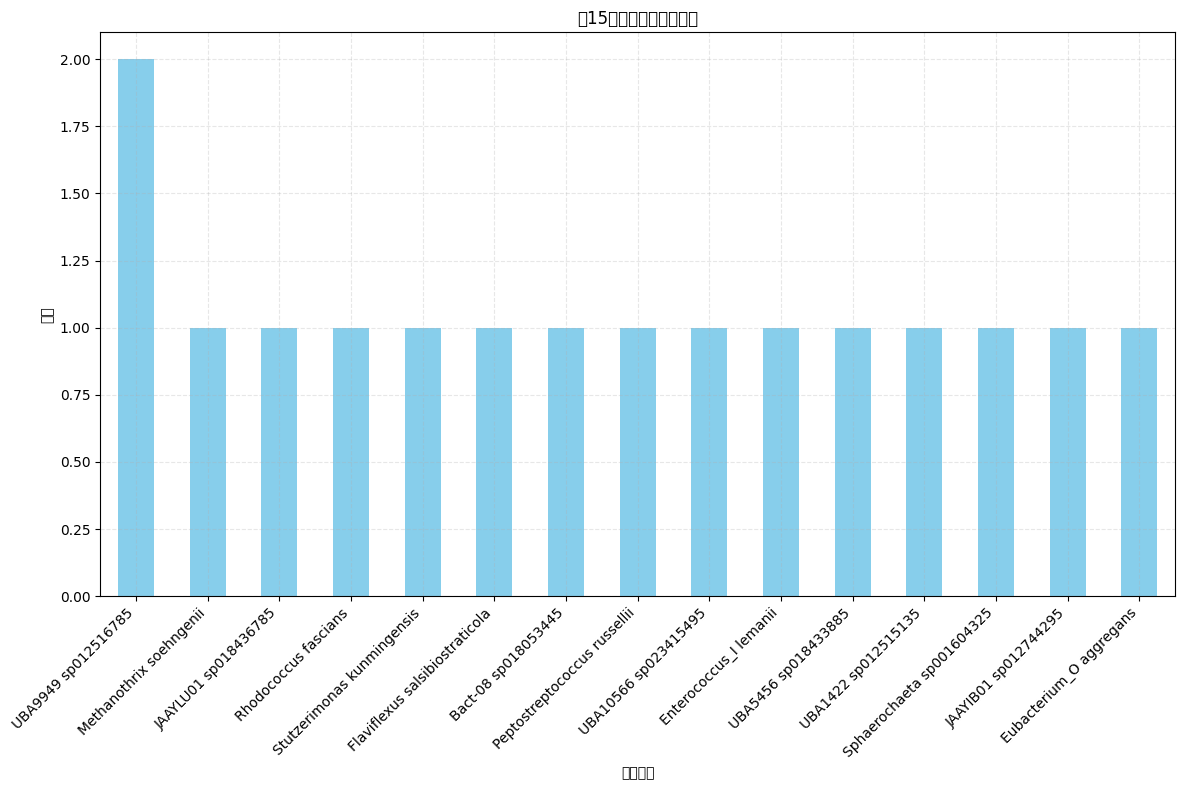

/var/folders/6w/knrbtrj125ggkrx091kd2g840000gn/T/ipykernel_10524/986106810.py:50: UserWarning: Glyph 29289 (\N{CJK UNIFIED IDEOGRAPH-7269}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/6w/knrbtrj125ggkrx091kd2g840000gn/T/ipykernel_10524/986106810.py:50: UserWarning: Glyph 31181 (\N{CJK UNIFIED IDEOGRAPH-79CD}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/6w/knrbtrj125ggkrx091kd2g840000gn/T/ipykernel_10524/986106810.py:50: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/6w/knrbtrj125ggkrx091kd2g840000gn/T/ipykernel_10524/986106810.py:50: UserWarning: Glyph 37327 (\N{CJK UNIFIED IDEOGRAPH-91CF}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/6w/knrbtrj125ggkrx091kd2g840000gn/T/ipykernel_10524/986106810.py:50: UserWarning: Glyph 19981 (\N{CJK UNIFIED IDEOGRAPH-4E0D}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/6w/knrbtrj12

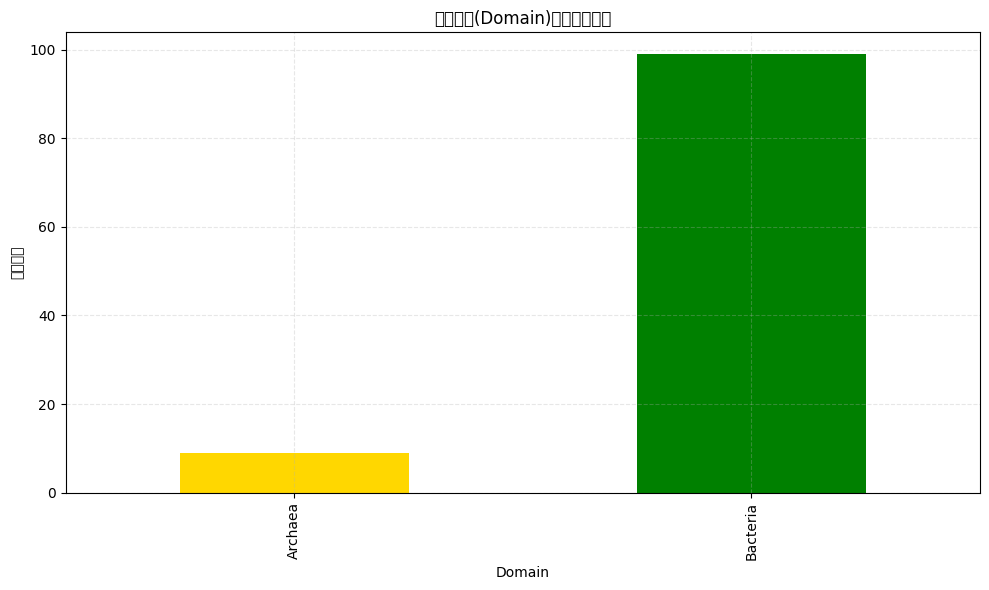


各物种拥有的基因组数量(前10):
species
UBA9949 sp012516785          2
Acetoanaerobium noterae      1
Petrimonas sp002356435       1
Sphaerochaeta sp001604325    1
Seramator thermalis          1
SR-FBR-E99 sp009881065       1
RumEn-M2 sp002506255         1
Rhodococcus fascians         1
Rectinema sp012516755        1
Rectinema sp003452735        1
Name: user_genome, dtype: int64


/var/folders/6w/knrbtrj125ggkrx091kd2g840000gn/T/ipykernel_10524/986106810.py:77: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/6w/knrbtrj125ggkrx091kd2g840000gn/T/ipykernel_10524/986106810.py:77: UserWarning: Glyph 31867 (\N{CJK UNIFIED IDEOGRAPH-7C7B}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/6w/knrbtrj125ggkrx091kd2g840000gn/T/ipykernel_10524/986106810.py:77: UserWarning: Glyph 27700 (\N{CJK UNIFIED IDEOGRAPH-6C34}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/6w/knrbtrj125ggkrx091kd2g840000gn/T/ipykernel_10524/986106810.py:77: UserWarning: Glyph 24179 (\N{CJK UNIFIED IDEOGRAPH-5E73}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/6w/knrbtrj125ggkrx091kd2g840000gn/T/ipykernel_10524/986106810.py:77: UserWarning: Glyph 32676 (\N{CJK UNIFIED IDEOGRAPH-7FA4}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/6w/knrbtrj12

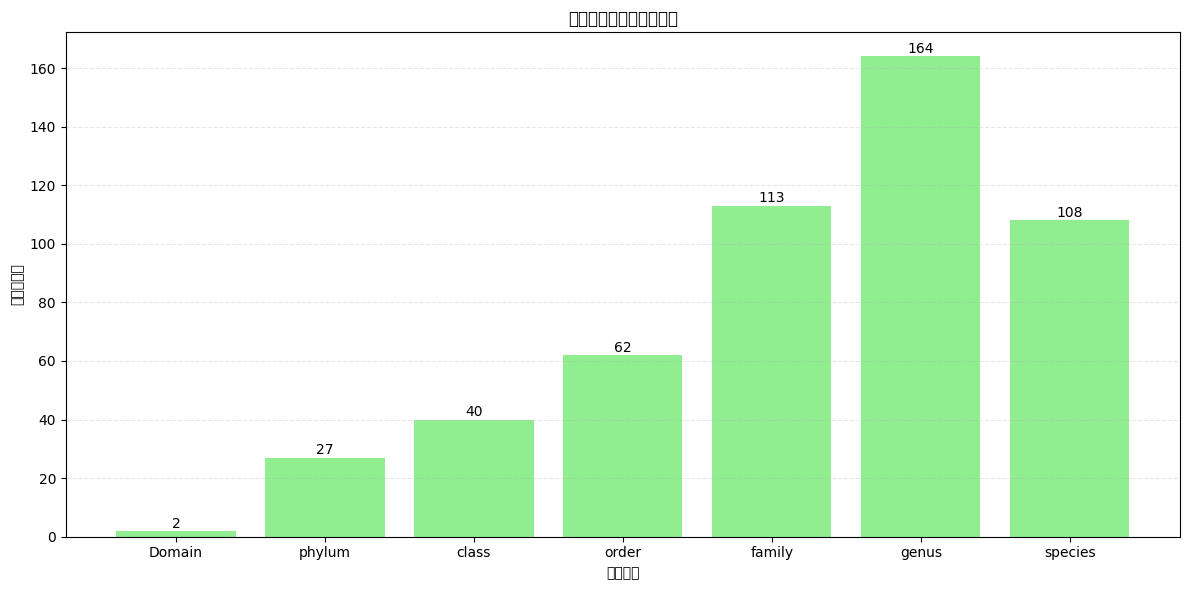

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 读取数据
file_path = "/Users/azddza/Electromics-project/data/gtdb_taxonomy.tsv"
data = pd.read_csv(file_path, sep='\t')

# 创建一个包含所有完整物种名称的Series
species_data = data['species'].dropna()

# 统计不同物种的数量
species_counts = species_data.value_counts()
print(f"共有 {len(species_counts)} 种不同的物种")
print(f"物种出现次数统计:\n{species_counts}\n")

# 获取前15个最常见的物种
top_species = species_counts.head(15)
print(f"前15个最常见的物种:\n{top_species}\n")

# 统计每个物种只出现一次的比例
unique_species_ratio = (species_counts == 1).mean() * 100
print(f"只出现一次的物种占总物种的比例: {unique_species_ratio:.2f}%")

# 按Domain对物种进行分组统计
species_by_domain = data.groupby('Domain')['species'].apply(
    lambda x: x.dropna().nunique()
)
print(f"\n不同领域(Domain)的物种数量:\n{species_by_domain}")

# 可视化物种分布
plt.figure(figsize=(12, 8))
top_species.plot(kind='bar', color='skyblue')
plt.title('前15个最常见物种的分布')
plt.xlabel('物种名称')
plt.ylabel('数量')
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

# 可视化Domain中的物种分布
plt.figure(figsize=(10, 6))
species_by_domain.plot(kind='bar', color=['gold', 'green'])
plt.title('不同领域(Domain)中物种的数量')
plt.xlabel('Domain')
plt.ylabel('物种数量')
plt.grid(True, alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

# 统计同一个物种(species)的不同基因组(user_genome)数量
species_genome_counts = data.dropna(subset=['species']).groupby('species')['user_genome'].nunique().sort_values(ascending=False)
print(f"\n各物种拥有的基因组数量(前10):\n{species_genome_counts.head(10)}")

# 统计不同分类水平的多样性
taxonomy_diversity = {}
for level in ['Domain', 'phylum', 'class', 'order', 'family', 'genus', 'species']:
    unique_taxa = data[level].dropna().nunique()
    taxonomy_diversity[level] = unique_taxa

# 可视化分类多样性
plt.figure(figsize=(12, 6))
bars = plt.bar(taxonomy_diversity.keys(), taxonomy_diversity.values(), color='lightgreen')
plt.title('各分类水平的分类群数量')
plt.xlabel('分类水平')
plt.ylabel('分类群数量')
plt.grid(True, alpha=0.3, linestyle='--', axis='y')

# 在柱状图上添加数值标签
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.1,
            f'{height}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

## 菌种分析


In [1]:
import pandas as pd
import numpy as np

data = {
    "Lab_Name": [
        "R1J142A", "R2J142A", "R3J142A", "R4J147A", "R5J141A", "R6J143A",
        "R4J147C", "R5J141C", "R6J143C",
        "Sg1AJ36C", "Sg1BJ36C", "Sg1CJ36C",
        "NSg1AJ41C", "NSg1BJ41C", "NSg1CJ41C"
    ],
    "Reactor_type": [
        "H", "H", "H", "H", "H", "H",
        "H", "H", "H",
        "Laborxing", "Laborxing", "Laborxing",
        "Laborxing", "Laborxing", "Laborxing"
    ],
    "Compartment": [
        "Anode", "Anode", "Anode", "Anode", "Anode", "Anode",
        "Cathode", "Cathode", "Cathode",
        "Cathode", "Cathode", "Cathode",
        "Cathode", "Cathode", "Cathode"
    ],
    "Community": [
        "Saline", "Saline", "Saline", "Non_saline", "Non_saline", "Non_saline",
        "Non_saline", "Non_saline", "Non_saline",
        "Saline", "Saline", "Saline",
        "Non_saline", "Non_saline", "Non_saline"
    ],
    "Day": [142, 142, 142, 147, 141, 143, 147, 141, 143, 36, 36, 36, 41, 41, 41],
    "Acetate (mg/L)": [14.2, None, None, 18.2, None, None, 3020.5, 3261.5, 3349.9, 1949.4, 1269.9, 1078.1, 1837.3, 2065.9, 1618.4],
    "Formate (mg/L)": [0, None, None, 0, None, None, 585.7, 23.8, 54.1, 8.1, 5.9, 7.5, 6.4, 6.2, 6.1],
    "Propionate (mg/L)": [0, None, None, 84.9, None, None, 29.9, 47.7, 45.7, 20.1, 16.1, 12.5, 272.5, 204.3, 227.1],
    "Lactate (mg/L)": [0, None, None, 0, None, None, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    "Butyrate (mg/L)": [0, None, None, 0, None, None, 0, 0, 0, 0, 0, 0, 201.2, 116.5, 93.9]
}

df_products = pd.DataFrame(data)
print(" Metabolite concentration table:")
print(df_products.head())

abundance_file = "../results/relative_abundance.csv"
df_abundance = pd.read_csv(abundance_file)

df_products.rename(columns={"Lab_Name": "Sample"}, inplace=True)
df_merged = pd.merge(df_products, df_abundance, on="Sample", how="inner")

df_merged


 Metabolite concentration table:
  Lab_Name Reactor_type Compartment   Community  Day  Acetate (mg/L)  \
0  R1J142A            H       Anode      Saline  142            14.2   
1  R2J142A            H       Anode      Saline  142             NaN   
2  R3J142A            H       Anode      Saline  142             NaN   
3  R4J147A            H       Anode  Non_saline  147            18.2   
4  R5J141A            H       Anode  Non_saline  141             NaN   

   Formate (mg/L)  Propionate (mg/L)  Lactate (mg/L)  Butyrate (mg/L)  
0             0.0                0.0             0.0              0.0  
1             NaN                NaN             NaN              NaN  
2             NaN                NaN             NaN              NaN  
3             0.0               84.9             0.0              0.0  
4             NaN                NaN             NaN              NaN  


,Sample,Reactor_type,Compartment,Community,Day,Acetate (mg/L),Formate (mg/L),Propionate (mg/L),Lactate (mg/L),Butyrate (mg/L),...,MAG231,MAG232,MAG233,MAG234,MAG235,MAG236,MAG237,MAG238,MAG239,MAG240
0,R1J142A,H,Anode,Saline,142,14.2,0.0,0.0,0.0,0.0,...,0.000000,0.000472,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000
1,R2J142A,H,Anode,Saline,142,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000249,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000
2,R3J142A,H,Anode,Saline,142,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.004000,0.000000,0.000000,0.000000,0.000510,0.000000,0.000000,0.000000,0.0000
3,R4J147A,H,Anode,Non_saline,147,18.2,0.0,84.9,0.0,0.0,...,0.000000,0.000000,0.000842,0.000000,0.000000,0.000000,0.000000,0.000075,0.000000,0.0000
4,R5J141A,H,Anode,Non_saline,141,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000080,0.000000,0.000000,0.000000,0.000000,0.000062,0.000000,0.0000
5,R6J143A,H,Anode,Non_saline,143,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000095,0.000000,0.0000
6,R4J147C,H,Cathode,Non_saline,147,3020.5,585.7,29.9,0.0,0.0,...,0.000000,0.000065,0.000000,0.000000,0.000145,0.000000,0.000000,0.000544,0.000000,0.0000
7,R5J141C,H,Cathode,Non_saline,141,3261.5,23.8,47.7,0.0,0.0,...,0.000000,0.000023,0.000000,0.000000,0.000185,0.000000,0.000000,0.000699,0.000000,0.0000
8,R6J143C,H,Cathode,Non_saline,143,3349.9,54.1,45.7,0.0,0.0,...,0.000000,0.000300,0.000000,0.000000,0.000068,0.000000,0.000000,0.000252,0.000000,0.0000
9,Sg1AJ36C,Laborxing,Cathode,Saline,36,1949.4,8.1,20.1,0.0,0.0,...,0.013631,0.007924,0.000620,0.000580,0.000119,0.009587,0.000088,0.000142,0.003009,0.0000


In [8]:
df_abundance

,Sample,MAG001,MAG002,MAG003,MAG004,MAG005,MAG006,MAG007,MAG008,MAG009,...,MAG231,MAG232,MAG233,MAG234,MAG235,MAG236,MAG237,MAG238,MAG239,MAG240
0,NSg1AJ41C,0.054366,0.040093,0.008691,0.036534,0.030142,0.009026,0.008827,0.017608,0.043656,...,0.000000,0.000026,0.000135,0.000000,0.000049,0.000000,0.000000,0.000503,0.000000,0.0000
1,NSg1BJ41C,0.000000,0.050180,0.004598,0.041599,0.004452,0.010685,0.009880,0.022073,0.027904,...,0.000000,0.000028,0.000150,0.000000,0.000057,0.000000,0.000000,0.000557,0.000000,0.0000
2,NSg1CJ41C,0.000000,0.030369,0.000000,0.000000,0.000272,0.009438,0.012034,0.017787,0.016808,...,0.000000,0.000038,0.000209,0.000000,0.000047,0.000000,0.000000,0.000536,0.000000,0.0000
3,R1J142A,0.000000,0.000000,0.000000,0.000000,0.000021,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000472,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000
4,R2J142A,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000249,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000
5,R3J142A,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.004000,0.000000,0.000000,0.000000,0.000510,0.000000,0.000000,0.000000,0.0000
6,R4J147A,0.000000,0.006760,0.000000,0.000000,0.000000,0.000000,0.000000,0.000150,0.000029,...,0.000000,0.000000,0.000842,0.000000,0.000000,0.000000,0.000000,0.000075,0.000000,0.0000
7,R4J147C,0.000000,0.002058,0.000000,0.004176,0.000145,0.000000,0.000323,0.021337,0.000000,...,0.000000,0.000065,0.000000,0.000000,0.000145,0.000000,0.000000,0.000544,0.000000,0.0000
8,R5J141A,0.000000,0.006423,0.000056,0.000000,0.000000,0.000000,0.000006,0.000180,0.000000,...,0.000000,0.000000,0.000080,0.000000,0.000000,0.000000,0.000000,0.000062,0.000000,0.0000
9,R5J141C,0.000000,0.000480,0.000000,0.001034,0.002577,0.000000,0.000612,0.023001,0.000000,...,0.000000,0.000023,0.000000,0.000000,0.000185,0.000000,0.000000,0.000699,0.000000,0.0000


In [ ]:
import pandas as pd
from scipy.stats import spearmanr

df = df_merged.copy()
mag_cols = [col for col in df.columns if col.startswith("MAG")]
target_metabolites = ["Propionate (mg/L)", "Butyrate (mg/L)"]

def compute_spearman(df, target_col, mag_columns):
    results = []
    for mag in mag_columns:
        valid = df[target_col].notna() & df[mag].notna()
        if valid.sum() >= 4:
            coef, pval = spearmanr(df.loc[valid, target_col], df.loc[valid, mag])
            results.append((mag, coef, pval))
    return pd.DataFrame(results, columns=["MAG", "Spearman_corr", "p_value"]).sort_values("Spearman_corr", ascending=False)

# 保存所有相关性结果（包括非显著）
for metabolite in target_metabolites:
    print(f"\n Spearman correlation for {metabolite}:\n")
    df_corr = compute_spearman(df, metabolite, mag_cols)

    # 打印前几行
    print(df_corr.head())

    # 保存为 CSV 文件（全部结果）
    out_name = metabolite.replace("/", "_").replace(" ", "_") + "_correlation.csv"
    df_corr.to_csv(out_name, index=False)



 Spearman correlation for Propionate (mg/L):

        MAG  Spearman_corr   p_value
52   MAG053       0.949094  0.000008
42   MAG043       0.935819  0.000023
35   MAG036       0.935819  0.000023
27   MAG028       0.935819  0.000023
204  MAG205       0.911875  0.000092

 Spearman correlation for Butyrate (mg/L):

       MAG  Spearman_corr       p_value
36  MAG037       1.000000  0.000000e+00
13  MAG014       1.000000  0.000000e+00
24  MAG025       0.985294  3.250533e-08
22  MAG023       0.985294  3.250533e-08
5   MAG006       0.955882  4.370265e-06


/var/folders/6w/knrbtrj125ggkrx091kd2g840000gn/T/ipykernel_97840/3974100622.py:13: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  coef, pval = spearmanr(df.loc[valid, target_col], df.loc[valid, mag])
/var/folders/6w/knrbtrj125ggkrx091kd2g840000gn/T/ipykernel_97840/3974100622.py:13: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  coef, pval = spearmanr(df.loc[valid, target_col], df.loc[valid, mag])


In [17]:
import pandas as pd

# 读取4个文件
df_but_corr = pd.read_csv("../results/Butyrate_(mg_L)_correlation.csv")
df_prop_corr = pd.read_csv("../results/Propionate_(mg_L)_correlation.csv")
df_but_block = pd.read_csv("../results/blocked_butyrate.csv")
df_prop_block = pd.read_csv("../results/blocked_propionate.csv")

# 从 model_id 中提取 MAG 名称（标准格式：MAG001）
df_but_block["MAG"] = df_but_block["model_id"].str.extract(r"(MAG\d+)")
df_prop_block["MAG"] = df_prop_block["model_id"].str.extract(r"(MAG\d+)")

# 过滤相关性显著的 MAG（p < 0.05）
sig_but_corr = df_but_corr[df_but_corr["p_value"] < 0.05]
sig_prop_corr = df_prop_corr[df_prop_corr["p_value"] < 0.05]

# 筛选同时 blocked 且显著相关的 MAG
blocked_but_corr = sig_but_corr[sig_but_corr["MAG"].isin(df_but_block["MAG"])]
blocked_prop_corr = sig_prop_corr[sig_prop_corr["MAG"].isin(df_prop_block["MAG"])]

# 输出摘要
print("Blocked + Significant MAGs for Butyrate:")
print(blocked_but_corr.sort_values("Spearman_corr", ascending=False))

print("\nBlocked + Significant MAGs for Propionate:")
print(blocked_prop_corr.sort_values("Spearman_corr", ascending=False))

# 保存为 CSV
#blocked_but_corr.to_csv("../results/blocked_highcorr_butyrate.csv", index=False)
#blocked_prop_corr.to_csv("../results/blocked_highcorr_propionate.csv", index=False)





Blocked + Significant MAGs for Butyrate:
       MAG  Spearman_corr       p_value
2   MAG025       0.985294  3.250533e-08
7   MAG020       0.910642  9.795098e-05
9   MAG039       0.870466  4.904339e-04
20  MAG030       0.788241  3.949666e-03
22  MAG043       0.781823  4.472747e-03
23  MAG036       0.781823  4.472747e-03
26  MAG054       0.776114  4.979545e-03
29  MAG013       0.769244  5.644056e-03
43  MAG205       0.680485  2.119279e-02
44  MAG019       0.679100  2.156096e-02
46  MAG158       0.676285  2.232277e-02
49  MAG001       0.635934  3.544990e-02
50  MAG150       0.615395  4.386006e-02

Blocked + Significant MAGs for Propionate:
        MAG  Spearman_corr   p_value
20   MAG038       0.858116  0.000725
31   MAG010       0.819978  0.001998
49   MAG041       0.753692  0.007387
55   MAG018       0.743701  0.008696
63   MAG005       0.660578  0.026929
224  MAG071      -0.786245  0.004107


In [23]:

df_but = blocked_but_corr
df_prop = blocked_prop_corr
df_tax = pd.read_csv("../data/gtdb_taxonomy.tsv", sep='\t')  
df_tax["user_genome"] = df_tax["user_genome"].str.strip()
df_but["MAG"] = df_but["MAG"].str.strip()
df_prop["MAG"] = df_prop["MAG"].str.strip()


df_but_annot = pd.merge(df_but, df_tax[["user_genome", "family","genus"]], left_on="MAG", right_on="user_genome", how="left")
df_prop_annot = pd.merge(df_prop, df_tax[["user_genome", "family","genus"]], left_on="MAG", right_on="user_genome", how="left")


#df_but_annot.drop(columns=["user_genome"], inplace=True)
#df_prop_annot.drop(columns=["user_genome"], inplace=True)

# Step 5: 保存
#df_but_annot.to_csv("../results/blocked_highcorr_butyrate_with_genus.csv", index=False)
#df_prop_annot.to_csv("../results/blocked_highcorr_propionate_with_genus.csv", index=False)

df_but_annot




/var/folders/6w/knrbtrj125ggkrx091kd2g840000gn/T/ipykernel_97840/2839892404.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_but["MAG"] = df_but["MAG"].str.strip()
/var/folders/6w/knrbtrj125ggkrx091kd2g840000gn/T/ipykernel_97840/2839892404.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_prop["MAG"] = df_prop["MAG"].str.strip()


,MAG,Spearman_corr,p_value,user_genome,family,genus
0,MAG025,0.985294,3.250533e-08,MAG025,Butyricicoccaceae,SCN-57-10
1,MAG020,0.910642,9.795098e-05,MAG020,Dysgonomonadaceae,Petrimonas
2,MAG039,0.870466,4.904339e-04,MAG039,Sporomusaceae,Sporomusa
3,MAG030,0.788241,3.949666e-03,MAG030,Sedimentibacteraceae,Sedimentibacter
4,MAG043,0.781823,4.472747e-03,MAG043,Synergistaceae,Syner-03
5,MAG036,0.781823,4.472747e-03,MAG036,Anaerovoracaceae,UBA1422
6,MAG054,0.776114,4.979545e-03,MAG054,Cloacimonadaceae,Syntrophosphaera
7,MAG013,0.769244,5.644056e-03,MAG013,Cloacimonadaceae,Syntrophosphaera
8,MAG205,0.680485,2.119279e-02,MAG205,Aminobacteriaceae,Aminivibrio
9,MAG019,0.679100,2.156096e-02,MAG019,Dysgonomonadaceae,Petrimonas


In [24]:
df_prop_annot


,MAG,Spearman_corr,p_value,user_genome,family,genus
0,MAG038,0.858116,0.000725,MAG038,Rhodocyclaceae,Azospira
1,MAG010,0.819978,0.001998,MAG010,Rhodocyclaceae,JAEWVQ01
2,MAG041,0.753692,0.007387,MAG041,Burkholderiaceae,Comamonas
3,MAG018,0.743701,0.008696,MAG018,Smithellaceae,UBA8904
4,MAG005,0.660578,0.026929,MAG005,Xanthomonadaceae,Stenotrophomonas
5,MAG071,-0.786245,0.004107,MAG071,Anaerovoracaceae,JAAYHT01
